In [1]:
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.preprocessing import OneHotEncoder

from imblearn.over_sampling import SMOTE

2024-05-19 18:06:56.073803: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-19 18:06:56.073966: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-19 18:06:56.252698: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
train_df = pd.read_csv("/kaggle/input/train-fe/FE_Train.csv")
train_df.head()

,Unnamed: 0,outlet_city,cluster_catgeory,Luxury_Sales_Ratio,Fresh_Sales_Ratio,Dry_Sales_Ratio
0,0,0,4,0.166667,0.104167,0.729167
1,1,0,1,0.183673,0.122449,0.693878
2,2,0,4,0.177083,0.114583,0.708333
3,3,0,4,0.173469,0.132653,0.693878
4,4,0,4,0.171717,0.151515,0.676768


In [3]:
X = train_df.drop(columns= ['cluster_catgeory', 'Unnamed: 0'])
y = train_df['cluster_catgeory'] 

In [4]:
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.values.reshape(-1, 1)).toarray()
y_encoded

array([[0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [5]:
X_train = X
y_train = y_encoded

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42,stratify= y_encoded)

In [7]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
y_true_labels = encoder.inverse_transform(y_train)

# Count occurrences of each label
label_counts = pd.Series(y_true_labels.ravel()).value_counts()

print("Composition of Labels in the Train Set:")
print(label_counts)

Composition of Labels in the Train Set:
2    151160
5    151160
6    151160
3    151160
4    151160
1    151160
Name: count, dtype: int64


In [9]:
y_true_labels = encoder.inverse_transform(y_test)

# Count occurrences of each label
label_counts = pd.Series(y_true_labels.ravel()).value_counts()

print("Composition of Labels in the Test Set:")
print(label_counts)

Composition of Labels in the Test Set:
1    37790
4    34481
6    33837
2    31005
3     9777
5     7902
Name: count, dtype: int64


In [10]:
hidden_units=16
learning_rate=0.001
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=10

In [11]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation=hidden_layer_act))
model.add(Dense(6, activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           102 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182 (728.00 B)

 Trainable params: 182 (728.00 B)

 Non-trainable params: 0 (0.00 B)

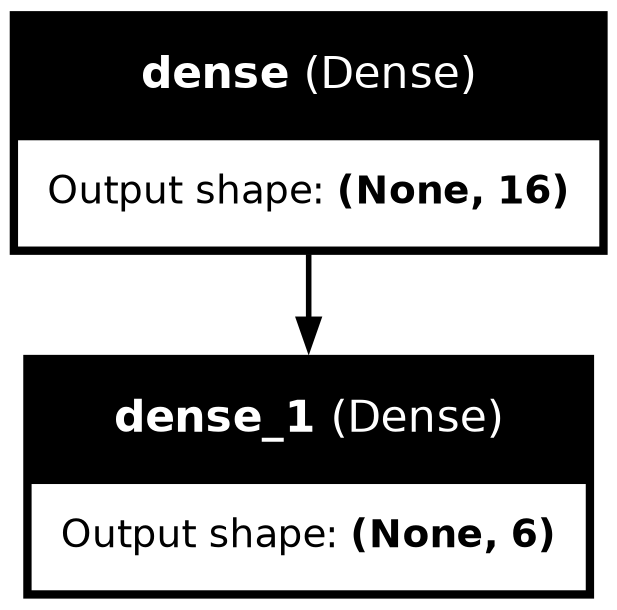

In [12]:
from keras.utils import plot_model
model.summary()

# Generate the model visualization
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [13]:
y_sampled_labels = encoder.inverse_transform(y_train)

# Count occurrences of each label
label_counts = pd.Series(y_sampled_labels.ravel()).value_counts()

print("Composition of Labels in the Test Set:")
print(label_counts)

Composition of Labels in the Test Set:
2    151160
5    151160
6    151160
3    151160
4    151160
1    151160
Name: count, dtype: int64


In [14]:
from keras.optimizers import Adam
# Define a lower learning rate
learning_rate = 0.0001  # Example: You can adjust this value as needed

# Create an optimizer with the lower learning rate
optimizer = Adam(learning_rate=learning_rate)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Epoch 1/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9736 - loss: 0.1450 - val_accuracy: 0.9997 - val_loss: 0.0030
Epoch 2/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9997 - val_loss: 0.0034
Epoch 3/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 0.0028
Epoch 4/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - accuracy: 0.9999 - loss: 0.0014 - val_accuracy: 0.9998 - val_loss: 0.0030
Epoch 5/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 0.0030
Epoch 6/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.9999 - loss: 0.0013 - val_accuracy: 0.9997 - val_loss: 0.0037
Epoch 7/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 41s 1ms/step - accuracy: 0.9999 - loss: 0.0016 - val_accuracy: 0.9997 - val_loss: 0.0032
Epoch 8/10
25509/25509 ━━━━━━━━━━━━━━━━━━━━ 33s 1ms/step - accuracy: 

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

4838/4838 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 1.0000 - loss: 7.8365e-04
Test Loss: 0.0009931388776749372, Test Accuracy: 0.9999353885650635


In [17]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

# Get predicted probabilities for each class
y_pred_prob = model.predict(X_test)

# Decode one-hot encoded labels
y_pred = encoder.inverse_transform(y_pred_prob)

# Convert y_test back to labels
y_true = encoder.inverse_transform(y_test)

4838/4838 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 1.0000 - loss: 7.8365e-04
Test Loss: 0.0009931388776749372, Test Accuracy: 0.9999353885650635
4838/4838 ━━━━━━━━━━━━━━━━━━━━ 5s 968us/step


4838/4838 ━━━━━━━━━━━━━━━━━━━━ 5s 992us/step


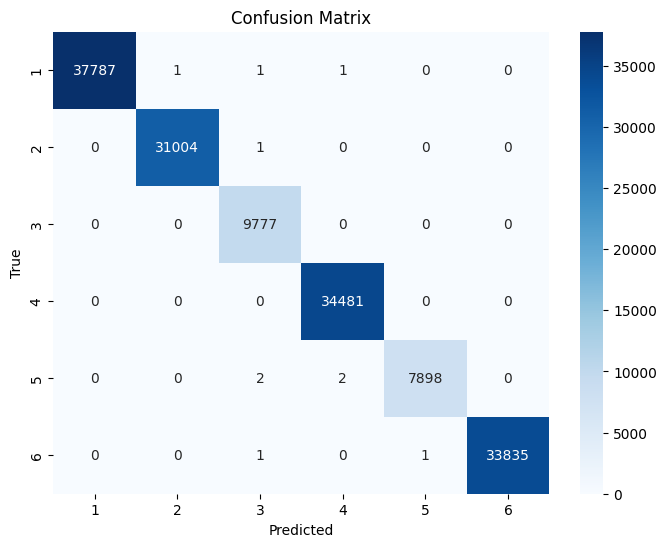

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predicted labels for the test set
y_pred_labels = encoder.inverse_transform(model.predict(X_test))

# Compute confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.categories_[0], yticklabels=encoder.categories_[0])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.eps', format ='eps')
plt.show()

In [19]:
test_df = pd.read_csv('/kaggle/input/cleaned-test-files-datastorm-5/cleaned_test_set_v1.csv')
test_df.head()

,Customer_ID,outlet_city,luxury_sales,fresh_sales,dry_sales
0,33574,Batticaloa,2686.50,3582.00,12537.00
1,10089,Batticaloa,1717.56,2576.34,9446.58
2,38329,Batticaloa,854.04,1242.24,5201.88
3,11376,Batticaloa,1638.12,2320.67,9282.68
4,12410,Batticaloa,1039.09,1518.67,5435.24


In [20]:
test_df_cities = test_df['outlet_city'].unique()
train_df_cities = train_df['outlet_city'].unique()

exclude_cities = [elem for elem in test_df_cities if elem not in train_df_cities]

In [21]:
test_df['Total_Sales'] = test_df['luxury_sales'] + test_df['fresh_sales'] + test_df['dry_sales']
test_df['Luxury_Sales_Ratio'] = test_df.luxury_sales/test_df.Total_Sales
test_df['Fresh_Sales_Ratio'] = test_df.fresh_sales/test_df.Total_Sales
test_df['Dry_Sales_Ratio'] = test_df.dry_sales/test_df.Total_Sales
test_df.drop(columns=['luxury_sales','fresh_sales', 'dry_sales'],axis=1,inplace=True)
test_df.head()

,Customer_ID,outlet_city,Total_Sales,Luxury_Sales_Ratio,Fresh_Sales_Ratio,Dry_Sales_Ratio
0,33574,Batticaloa,18805.50,0.142857,0.190476,0.666667
1,10089,Batticaloa,13740.48,0.125000,0.187500,0.687500
2,38329,Batticaloa,7298.16,0.117021,0.170213,0.712766
3,11376,Batticaloa,13241.47,0.123711,0.175258,0.701031
4,12410,Batticaloa,7993.00,0.130000,0.190000,0.680000


In [22]:
outlet_cities_A = ['Batticaloa', 'Colombo', 'Jaffna', 'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo', 'Trincomalee', 'Kandy', 'Anuradhapura']
outlet_cities_B = ['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama', 'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda', 'Kotte', 'Nuwara Eliya', 'Madawachiya']

def assign_outlet_city(x):
    if x in outlet_cities_A:
        return 1
    elif x in outlet_cities_B:
        return 0
    else:
        print("none")
        return None 

In [23]:
test_df['outlet_city'] = test_df['outlet_city'].apply(assign_outlet_city)

In [24]:
exclude_cities = []
exclude_cities.append('Customer_ID')
X_predict = test_df.drop(columns= exclude_cities)

X_predict.head()

,outlet_city,Total_Sales,Luxury_Sales_Ratio,Fresh_Sales_Ratio,Dry_Sales_Ratio
0,1,18805.50,0.142857,0.190476,0.666667
1,1,13740.48,0.125000,0.187500,0.687500
2,1,7298.16,0.117021,0.170213,0.712766
3,1,13241.47,0.123711,0.175258,0.701031
4,1,7993.00,0.130000,0.190000,0.680000


In [25]:
X_predict = X_predict.drop(columns=['Total_Sales'])
X_predict.head()

,outlet_city,Luxury_Sales_Ratio,Fresh_Sales_Ratio,Dry_Sales_Ratio
0,1,0.142857,0.190476,0.666667
1,1,0.125000,0.187500,0.687500
2,1,0.117021,0.170213,0.712766
3,1,0.123711,0.175258,0.701031
4,1,0.130000,0.190000,0.680000


In [26]:
if X.shape[1] == X_predict.shape[1]:
    # Check if the columns are similar
    if X.columns.tolist() == X_predict.columns.tolist():
        print("The size and number of columns of the two DataFrames are similar.")
    else:
        print("The number of columns of the two DataFrames is not similar.")
else:
    print("The size of the two DataFrames is not similar.")

The size and number of columns of the two DataFrames are similar.


In [27]:
y_pred_prob = model.predict(X_predict)

# Decode one-hot encoded labels
y_pred = encoder.inverse_transform(y_pred_prob)

1274/1274 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [28]:
y_pred_reshaped = y_pred.flatten()

predictions_df = test_df
predictions_df['cluster category'] = y_pred_reshaped

In [29]:
predictions_df.head()

,Customer_ID,outlet_city,Total_Sales,Luxury_Sales_Ratio,Fresh_Sales_Ratio,Dry_Sales_Ratio,cluster category
0,33574,1,18805.50,0.142857,0.190476,0.666667,1
1,10089,1,13740.48,0.125000,0.187500,0.687500,1
2,38329,1,7298.16,0.117021,0.170213,0.712766,1
3,11376,1,13241.47,0.123711,0.175258,0.701031,1
4,12410,1,7993.00,0.130000,0.190000,0.680000,1


In [30]:
submission_df= predictions_df.drop(columns= ['outlet_city','Total_Sales', 'Luxury_Sales_Ratio', 'Fresh_Sales_Ratio','Dry_Sales_Ratio'])
submission_df.head()

,Customer_ID,cluster category
0,33574,1
1,10089,1
2,38329,1
3,11376,1
4,12410,1


In [31]:
submission_df.rename(columns={'cluster category': 'cluster_catgeory'}, inplace=True)
submission_df.head()

,Customer_ID,cluster_catgeory
0,33574,1
1,10089,1
2,38329,1
3,11376,1
4,12410,1


In [32]:
submission_df.to_csv('submission_with_smote_new_model_standard_no_validation_smote_madawa_no_outliers.csv', index=False)